In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [47]:
df = pd.read_excel('RJ_Reconstrucao_Moluscos_2024_06_06.xlsx')

In [48]:
df.head()

,Ano,Lula_art,Lula_ind,Lula_art_ind,Lula_oceanica_art,Calamar_ind,Polvo_art,Polvo_ind,Polvo_art_ind,Polvo_cabecinha_art,...,Mexilhao_art,Mexilhao_ind,Mexilhao_mangue_art,Caramujo_art,Caramujo_ind,Vieira_ind,Berbigao_art,Vongole_art,TOTAL_MOLLUSCS,TOTAL_GROUPS_F&M
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28137.0
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27432.0
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26648.0
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24552.0
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22755.0


In [51]:
df[['Lula_art', 'Lula_ind']] = df[['Lula_art', 'Lula_ind']].fillna(0)
df['Lula_art_ind'] = df['Lula_art_ind'].fillna(0)
df['Lula_sum'] = df['Lula_art'] + df['Lula_ind'] + df['Lula_art_ind']
lula_total = pd.DataFrame(df[['Ano', 'Lula_sum']].values, columns=['Ano', 'Lula_total'])
df = lula_total.replace(0, np.nan)

print(df)

       Ano  Lula_total
0   1950.0         NaN
1   1951.0         NaN
2   1952.0         NaN
3   1953.0         NaN
4   1954.0         NaN
..     ...         ...
68  2018.0     78.4235
69  2019.0     80.8258
70  2020.0     43.4189
71  2021.0     82.2118
72  2022.0     76.8663

[73 rows x 2 columns]


In [55]:
x0 = df[['Ano', 'Lula_art']].dropna().values
x1 = df[['Ano', 'Lula_ind']].dropna().values

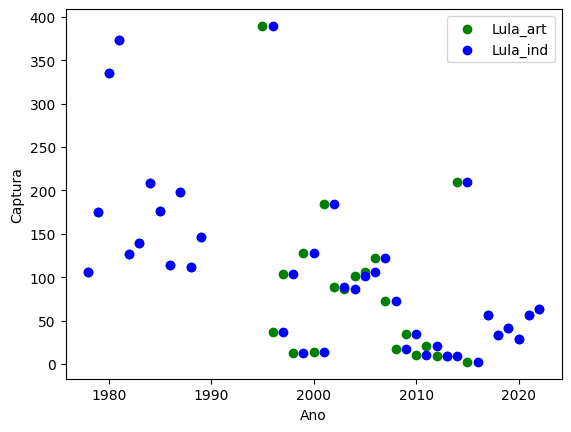

In [56]:
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='Lula_art')
plt.scatter(x1[:,0], x0[:,1], c='b', label= 'Lula_ind')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [59]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Lula_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Lula_ind'])
df_x0= df_x0.drop_duplicates(subset= 'Lula_art')
df_x1= df_x1.drop_duplicates(subset='Lula_ind')

In [83]:
print(df_x1)

       Ano   Lula_ind
0   1978.0   20.00000
1   1979.0  129.00000
2   1980.0   18.00000
3   1981.0  115.00000
5   1983.0   12.00000
6   1984.0   87.00000
7   1985.0   23.00000
8   1986.0   57.00000
9   1987.0   30.00000
10  1988.0    6.00000
11  1989.0   21.00000
12  1996.0  286.00000
13  1997.0  488.50000
14  1998.0  252.50000
15  1999.0  345.50000
16  2000.0  637.50000
17  2001.0  214.00000
18  2002.0  387.50000
19  2003.0  389.50000
20  2004.0  444.00000
21  2005.0  421.50000
22  2006.0  507.00000
23  2007.0  572.50000
24  2008.0    2.16700
25  2009.0   28.50900
26  2010.0   22.62700
27  2011.0  210.69100
28  2012.0  201.51000
29  2013.0   76.17800
30  2014.0   94.94300
31  2015.0   25.06800
32  2016.0    0.02300
33  2017.0   70.80297
34  2018.0   44.52010
35  2019.0   38.86220
36  2020.0   13.99680
37  2021.0   25.39180
38  2022.0   13.43200


In [82]:
print(df_x0)

       Ano   Lula_art
0   1978.0  106.00000
1   1979.0  175.00000
2   1980.0  335.00000
3   1981.0  373.00000
4   1982.0  127.00000
5   1983.0  140.00000
6   1984.0  209.00000
7   1985.0  176.00000
8   1986.0  114.00000
9   1987.0  198.00000
10  1988.0  112.00000
11  1989.0  146.00000
12  1995.0  389.50000
13  1996.0   36.50000
14  1997.0  104.00000
15  1998.0   12.50000
16  1999.0  127.50000
17  2000.0   14.00000
18  2001.0  184.50000
19  2002.0   88.50000
20  2003.0   86.50000
21  2004.0  101.00000
22  2005.0  106.50000
23  2006.0  122.50000
24  2007.0   72.50000
25  2008.0   17.56000
26  2009.0   34.53020
27  2010.0   10.68000
28  2011.0   20.59300
29  2012.0    8.87800
30  2013.0    9.59600
31  2014.0  209.83900
32  2015.0    2.51700
33  2017.0   56.96003
34  2018.0   33.90340
35  2019.0   41.96360
36  2020.0   29.42210
37  2021.0   56.82000
38  2022.0   63.43430


Normalização Dos dados

In [85]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Lula_art'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [98]:
def leaky_relu(x):
    return tf.nn.RMSprop(x, alpha=0.01)

Epoch 1/10000


C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 155us/step - loss: 0.5118 - mse: 1.0035 
Epoch 2/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 0.5096 - mse: 0.9991
Epoch 3/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.5090 - mse: 0.9980
Epoch 4/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.5086 - mse: 0.9972  
Epoch 5/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.5082 - mse: 0.9964  
Epoch 6/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - loss: 0.5077 - mse: 0.9954
Epoch 7/10000
 1/50 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9942 - mse: 0.9942

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.5070 - mse: 0.9942
Epoch 8/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.5062 - mse: 0.9925
Epoch 9/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - loss: 0.4984 - mse: 0.9772
Epoch 10/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.4913 - mse: 0.9634
Epoch 11/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4842 - mse: 0.9494  
Epoch 12/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - loss: 0.4774 - mse: 0.9362
Epoch 13/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4690 - mse: 0.9195  
Epoch 14/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4610 - mse: 0.9039  
Epoch 15/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.4511 - mse: 0.8844
Epoch 16/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4412 - mse: 0.8652  
Epoch 17/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4300 - mse: 0.8432  
Epoch 18/10000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.4195 - mse: 0.8225
Epoc

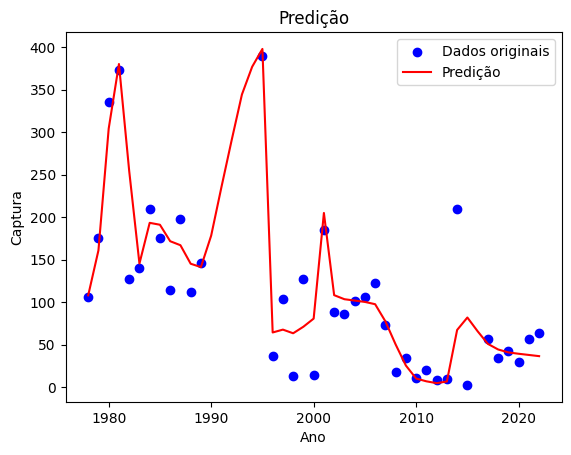

KeyError: 'accuracy'

In [109]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])


history = model.fit(x_normalized, y_normalized, epochs= 2000, batch_size= 64, steps_per_epoch= 50, verbose=True)

x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()
